In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('kyphosis.csv')
df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


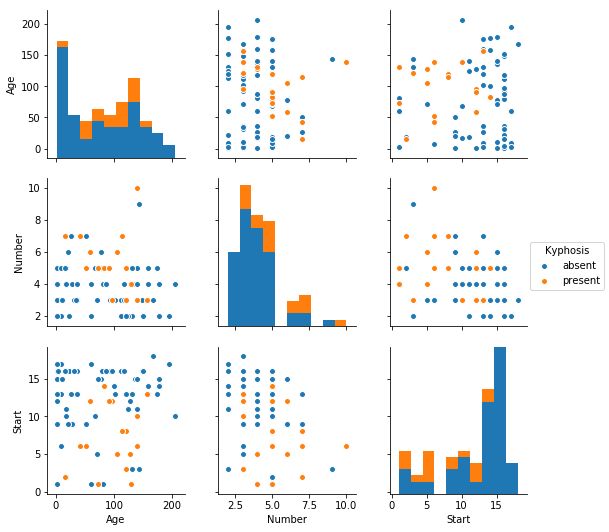

In [4]:
sns.pairplot(data=df, hue='Kyphosis')

In [5]:
from sklearn.cross_validation import train_test_split

In [6]:
x=df.drop('Kyphosis', axis=1)    
y= df['Kyphosis']
x_tr, x_ts, y_tr, y_ts = train_test_split(x,y,test_size=0.3)

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dtree = DecisionTreeClassifier()

In [9]:
dtree.fit(x_tr, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [10]:
pred = dtree.predict(x_ts)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
print(confusion_matrix(y_ts,pred))
print(classification_report(y_ts,pred))

[[18  2]
 [ 3  2]]
             precision    recall  f1-score   support

     absent       0.86      0.90      0.88        20
    present       0.50      0.40      0.44         5

avg / total       0.79      0.80      0.79        25



In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rfc = RandomForestClassifier(n_estimators=200)

In [17]:
rfc.fit(x_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [18]:
rfc_pred = rfc.predict(x_ts)

In [19]:
print(confusion_matrix(y_ts,rfc_pred))
print(classification_report(y_ts,rfc_pred))

[[19  1]
 [ 3  2]]
             precision    recall  f1-score   support

     absent       0.86      0.95      0.90        20
    present       0.67      0.40      0.50         5

avg / total       0.82      0.84      0.82        25

